In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"data2.bin"
num_patients = 1000
num_points = 10000
num_parameters = 10

DFF = np.fromfile("data2.bin", dtype=np.float32) 
DFF = DFF.reshape((num_patients, 10, num_points))

"status2.bin"
num_patients=1000
DFF_status = np.fromfile("status2.bin", dtype=np.float64) 


In [3]:
def compute_anom(data, axis=2):
    '''A function that computes the max Z-score of first order differences
    of every time series.  We will be using this value to classify anomalies'''
    #arguments: the 3d array of data
    #returns: anomaly_values - a collection of values representing the anomaly
    
    #computes differences between sequential points
    differences = np.diff(data, axis=axis)

    #finds standard deviation of differences to normalize by
    std = np.std(differences, axis=axis)

    #the anomaly value is the max of the absolute values of the normalized differences
    anomaly_values = np.max(np.abs(differences / std[:,:,np.newaxis]), axis=axis)
    return anomaly_values

In [4]:
anomaly_values = compute_anom(DFF, axis=2)

[]

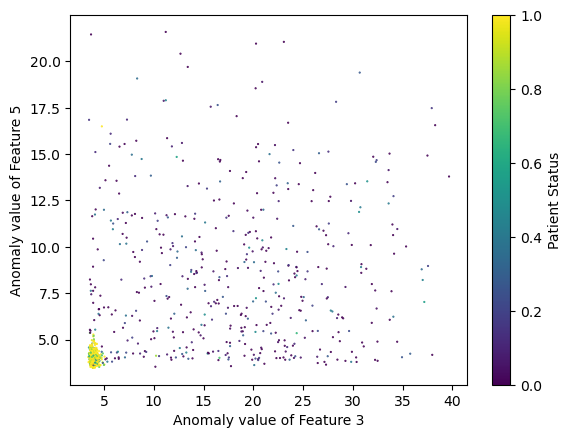

In [5]:
#there is a relationship between the anomaly values of
#features 3 and 5 and the patient statuses

plt.scatter(anomaly_values[:,2], anomaly_values[:,4], s=0.3, c=DFF_status)
cbar = plt.colorbar()
cbar.set_label('Patient Status')
plt.xlabel("Anomaly value of Feature 3")
plt.ylabel("Anomaly value of Feature 5")
plt.plot()

In [8]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()

In [10]:
from sklearn.model_selection import train_test_split

X = anomaly_values[:,[2,4]]
Y = DFF_status >= 0.5

random_seed=1020X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=random_seed)

classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

preds = classifier.predict(X_test)

accuracy = accuracy_score(Y_test, preds)
recall_healthy = recall_score(Y_test, preds)
recall_unhealthy = recall_score(Y_test, preds, pos_label=0)

print(f'Accuracy is {accuracy * 100}%')
print(f'Recall of healthy case is {recall_healthy * 100}%')
print(f'Recall of unhealthy case is {recall_unhealthy * 100}%')

Accuracy is 94.0%
Recall of healthy case is 93.75%
Recall of unhealthy case is 94.23076923076923%
